In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

In [2]:
df = pd.read_excel("Data/Doctor_specialization (1).xlsx", sheet_name = "Sheet3")
G = nx.DiGraph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

In [422]:
dic = {}
for col in df.columns:
    txt = col
    txt = txt.replace("(", " ")
    txt = txt.replace(")", " ")
    label = [int(s) for s in txt.split() if s.isdigit()]
    s_comp = '' 
    for s in txt.split()[:-1]:
        s_comp = s_comp+ ' ' + s
    # print(s_comp[:1])
    if s_comp[:1] == " ":
        s_comp = s_comp[1:]

    label_txt = [s_comp]

    if len(label)>0: 
        souce_node = label[0]
        dic[label_txt[0].upper()] = label[0]
    else: continue;
    for row in range(len(df)):
        row_i = str(df[col].iloc[row])
        if row_i=="nan": continue;
        else: 
            row_i = row_i.replace("(", " ")
            row_i = row_i.replace(")", " ")
            label_sink = [int(s) for s in row_i.split() if s.isdigit()]
            # label_sink_txt = [s for s in row_i.split()]
            if len(label_sink)>0:  
                G.add_edges_from([(souce_node, label_sink[0])])
                s_comp_sink = '' 
                for s in row_i.split()[:-1]:
                    s_comp_sink = s_comp_sink+ ' ' + s
                # print(s_comp[:1])
                if s_comp_sink[:1] == " ":
                    s_comp_sink = s_comp_sink[1:]
                label_sink_txt = [s_comp_sink]
                dic[label_sink_txt[0].upper()] = label_sink[0]
            else: continue;


In [423]:
dic

{'ALLERGY/IMMUNOLOGY': 58,
 'ANESTHESIOLOGY': 4,
 'CERTIFIED REGISTERED NURSE ANESTHETIST CRNA': 16,
 'PAIN MANAGEMENT': 18,
 'ANESTHESIOLOGY ASSISTANT': 67,
 'INTERVENTIONAL PAIN MANAGEMENT': 69,
 'HOSPICE/PALLIATIVE CARE': 40,
 'CRITICAL CARE INTENSIVISTS': 36,
 'SLEEP MEDICINE': 74,
 'DERMATOLOGY': 32,
 'MICROGRAPHIC DERMATOLOGIC SURGERY': 71,
 'EMERGENCY MEDICINE': 45,
 'SPORT MEDICINE': 59,
 'UNDERSEA AND HYPERBARIC MEDICINE': 81,
 'MEDICAL TOXICOLOGY': 85,
 'FAMILY PRACTICE': 14,
 'GERIATRIC MEDICINE': 46,
 'HEMATOLOGY': 55,
 'HEMATOLOGY/ONCOLOGY': 52,
 'INTERNAL MEDICINE': 2,
 'CARDIOVASCULAR DISEASE CARDIOLOGY': 15,
 'INFECTIOUS DISEASE': 22,
 'ENDOCRINOLOGY': 25,
 'RHEUMATOLOGY': 29,
 'NEPHROLOGY': 33,
 'PULMONARY DISEASE': 41,
 'INTERVENTIONAL CARDIOLOGY': 42,
 'GASTROENTEROLOGY': 43,
 'CARDIAC ELECTROPHYSIOLOGY': 54,
 'ADULT CONGENITAL HEART DISEASE ACHD': 84,
 'ADVANCED HEART FAILURE AND TRANSPLANT CARDIOLOGY': 64,
 'REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL': 38,
 'ME

In [424]:
txt = col
txt = txt.replace("(", " ")
txt = txt.replace(")", " ")
label_txt = [s for s in txt.split()]
label = [int(s) for s in txt.split() if s.isdigit()]
print(label_txt,label)

['Clinical', 'Psychologist', '37'] [37]


In [425]:
in_degrees = [val for (node, val) in G.in_degree()]
out_degrees = [val for (node, val) in G.out_degree()]
clustering = list(nx.clustering(G).values())
in_degree_centrality = list(nx.in_degree_centrality(G).values())
out_degree_centrality = list(nx.out_degree_centrality(G).values())

In [426]:
degrees = pd.DataFrame({"Nodes":list(G.nodes), "In Degree":in_degrees, "Out Degree":out_degrees,"Clustering":clustering,"In degree centrality":in_degree_centrality,"Out degree centrality":out_degree_centrality})

In [427]:
degrees.to_csv("degrees.csv")

In [428]:
degrees

,Nodes,In Degree,Out Degree,Clustering,In degree centrality,Out degree centrality
0,4,0,7,0.0,0.000000,0.100000
1,16,2,0,0.0,0.028571,0.000000
2,18,8,0,0.0,0.114286,0.000000
3,67,1,0,0.0,0.014286,0.000000
4,69,1,0,0.0,0.014286,0.000000
...,...,...,...,...,...,...
66,9,1,0,0.0,0.014286,0.000000
67,49,1,0,0.0,0.014286,0.000000
68,1,1,0,0.0,0.014286,0.000000
69,10,0,3,0.0,0.000000,0.042857


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
from ast import literal_eval 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress, t
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import statsmodels.api as sm
import numpy as np

def scaling(x0,y0,name):
    print(len(x0))
    samis = Get_SAMIs(x0,y0)
    print("Var = ",np.round(np.var(samis),2))
    x = np.log10(x0)
    Y = np.log10(y0)
    X = sm.add_constant(x)
    model = sm.OLS(Y,X)
    fit = model.fit(cov_type='HC1')


    intercept, slope = fit.params
    print("intercept = ", np.round(intercept,2))
    print("c = ", np.round(10**intercept,2))

    x_0 =  np.sort(x0)[0]
    y_0 = 10**(slope*np.log10(x_0)+intercept)

    x_f = np.sort(x0)[-1]
    y_f = 10**(slope*np.log10(x_f)+intercept)
    y_null = 10**(np.log10(x_f)+intercept)

    beta = round(slope,3)
    R2 = str(round(fit.rsquared,3))
    print(beta, R2)
    beta_lowerbound, beta_upper = fit.conf_int()[1]
    beta_lowerbound = np.round(beta_lowerbound,2)
    beta_upper = np.round(beta_upper,2)


    # plt.rcParams.update({
    # 'font.size' : 20,
    # "lines.linewidth": 2,
    # "font.family":"arial",
    # #"font.serif": ["Computer Modern Roman"],
    # "mathtext.fontset": "cm",
    # "mathtext.default": "rm",
    # "mathtext.rm"  : "arial",
    #     })

    # fig,(ax)  = plt.subplots(1, 1, sharey='row',figsize=(6, 6))
    # ax.scatter(x0, y0, facecolors='none', edgecolors='k')
    # ax.plot([x_0,x_f],[y_0,y_f], lw = 2, color = 'k')

    # ax.text(0.05,0.95,r'$\beta = {}$'.format("{:.2f}".format(betta))+r'$ \, \in \,[{}$'.format(beta_lowerbound) + r'$,{}]$'.format(beta_upper),
    #         ha='left', va='top',transform=ax.transAxes)
    # ax.text(0.05,0.85,r'$\mathit{R}^2 = $' +r'${}$'.format(R2), ha='left', va='top',transform=ax.transAxes)

    # ax.set_yscale("log")
    # ax.set_xscale("log")
    # ax.set_xlabel("Population")
    # ax.set_ylabel(name)

    # # ax.set_ylim([0.1,10**4])
    # # ax.set_yticks([0.1,1,10**1,10**2,10**3,10**4], minor=True)

    # # ax.set_xlim([10**4,10**9])
    # # ax.set_xticks([10**4,10**5,10**6,10**7,10**8,10**9], minor=True)

    plt.show()
    return fit.conf_int(),samis,beta, float(R2),intercept,np.round(np.var(samis),2)

def Get_SAMIs(x0,y0):
    x = np.log10(x0)
    y = np.log10(y0)
    res = linregress(x,y)
    y_hat = res.intercept + res.slope*x
    SAMIs = y-y_hat
    return SAMIs


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress, t
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import statsmodels.api as sm
import numpy as np

def scaling_iloc(x0,y0,name):
    print(len(x0))
    samis = Get_SAMIs(x0,y0)
    # print("SAMIs = ",samis)
    print("Var = ",np.round(np.var(samis),2))
    x = np.log10(x0)
    Y = np.log10(y0)
    X = sm.add_constant(x)
    model = sm.OLS(Y,X)
    fit = model.fit(cov_type='HC1')


    intercept, slope = fit.params
    print("intercept = ", np.round(intercept,2))
    print("c = ", np.round(10**intercept,2))

    x_0 =  np.sort(x0)[0]
    y_0 = 10**(slope*np.log10(x_0)+intercept)

    x_f = np.sort(x0)[-1]
    y_f = 10**(slope*np.log10(x_f)+intercept)
    y_null = 10**(np.log10(x_f)+intercept)

    betta = round(slope,2)
    R2 = str(round(fit.rsquared,2))
    beta_lowerbound, beta_upper = fit.conf_int().iloc[1]
    beta_lowerbound = np.round(beta_lowerbound,2)
    beta_upper = np.round(beta_upper,2)


    plt.rcParams.update({
    'font.size' : 20,
    "lines.linewidth": 2,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "rm",
    "mathtext.rm"  : "arial",
        })

    fig,(ax)  = plt.subplots(1, 1, sharey='row',figsize=(6, 6))
    ax.scatter(x0, y0, facecolors='none', edgecolors='k')
    ax.plot([x_0,x_f],[y_0,y_f], lw = 2, color = 'k')

    ax.text(0.05,0.95,r'$\beta = {}$'.format("{:.2f}".format(betta))+r'$ \, \in \,[{}$'.format(beta_lowerbound) + r'$,{}]$'.format(beta_upper),
            ha='left', va='top',transform=ax.transAxes)
    ax.text(0.05,0.85,r'$\mathit{R}^2 = $' +r'${}$'.format(R2), ha='left', va='top',transform=ax.transAxes)

    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("Population")
    ax.set_ylabel(name)

    # ax.set_ylim([0.1,10**4])
    # ax.set_yticks([0.1,1,10**1,10**2,10**3,10**4], minor=True)

    # ax.set_xlim([10**4,10**9])
    # ax.set_xticks([10**4,10**5,10**6,10**7,10**8,10**9], minor=True)

    plt.show()
    return fit.conf_int(),samis,betta, float(R2),intercept,np.round(np.var(samis),2)

def Get_SAMIs(x0,y0):
    x = np.log10(x0)
    y = np.log10(y0)
    res = linregress(x,y)
    y_hat = res.intercept + res.slope*x
    SAMIs = y-y_hat
    return SAMIs


def all_upper(my_list):
    return list(map(lambda x: x.upper(), my_list))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_33273/98273881.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-up

In [4]:
doctor_national = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/DAC_NationalDownloadableFile.csv") ### doctor
zip_to_msa = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/Geography_MSA_ZIP_2018.csv") ### zip to msa
zip_to_msa["cbsa10"] = zip_to_msa["cbsa10"].astype("str")
zip_to_msa["cbsa10"] = ["C"+z[:4] for z in zip_to_msa["cbsa10"]]
zip_to_msa = zip_to_msa[zip_to_msa["cbsa10"]!="C9999"]
population_msa = zip_to_msa.groupby('cbsa10')['population_2016'].sum()
population_msa_count = population_msa.sort_index() ### population in MSA
population_msa_count

/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_33273/2153604934.py:1: DtypeWarning: Columns (14,15,26) have mixed types. Specify dtype option on import or set low_memory=False.
  doctor_national = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/DAC_NationalDownloadableFile.csv") ### doctor


cbsa10
C1002     60205.000
C1010     43080.003
C1014     71628.002
C1018    170363.999
C1022     38329.999
            ...    
C4962    443744.003
C4966    544745.998
C4970    171926.000
C4974    205631.001
C4978     86068.000
Name: population_2016, Length: 942, dtype: float64

In [7]:
len(doctor_national["pri_spec"])

2491222

In [8]:
beta_doctor_specialization = []
R2_doctor_specialization = []
intercept_doctor_specialization = []
var_sami_doctor_specialization = []
sami_doctor_specialization = []

for doc in doctor_national["pri_spec"].unique():
    print(doc)
    doctors = doctor_national[doctor_national["pri_spec"]== doc]  ##REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL,,"ENDOCRINOLOGY","INTERNAL MEDICINE","FAMILY PRACTICE",
    doctors.reset_index(inplace=True,drop=True)
    doctors["ZIP Code"] = doctors["ZIP Code"].astype(str)
    doctors["zip"] = [int(z[0:5]) for z in doctors["ZIP Code"]]
    doctors_msa = pd.merge(doctors,zip_to_msa,on="zip",how="left").dropna(subset=["cbsa10"])
    doctors_msa_count = doctors_msa.value_counts("cbsa10").sort_index()
    doctors_msa_count.keys()
    doctors_msa["ZIP"] = doctors_msa["zip"]
    doctors_msa.reset_index(drop=True,inplace=True)
    doctors_msa
    doctors_msa_unique = doctors_msa.drop_duplicates(subset='NPI', keep="last")
    doctors_msa_count = doctors_msa_unique.value_counts("cbsa10")
    # NUTRITION_msa_count = NUTRITION_msa.value_counts("cbsa10")
    set1 = set(population_msa_count.keys())
    set2 = set(doctors_msa_count.keys())
    intersection_set = set1.intersection(set2)
    msa_population = {k: population_msa_count[k] for k in intersection_set}
    msa_doctor = {k: doctors_msa_count[k] for k in intersection_set}
    fit, SAMIs_doctor,b,r,i,v = scaling(list(msa_population.values()),list(msa_doctor.values()),"Psychiatries in MSA")
    beta_doctor_specialization.append(b)
    R2_doctor_specialization.append(r)
    intercept_doctor_specialization.append(i)
    var_sami_doctor_specialization.append(v)
    sami_doctor_specialization.append(SAMIs_doctor)

HOSPITALIST
666
Var =  0.16
intercept =  -3.85
c =  0.0
0.917 0.61
INTERNAL MEDICINE
895
Var =  0.1
intercept =  -4.42
c =  0.0
1.139 0.799
PATHOLOGY
587
Var =  0.1
intercept =  -3.93
c =  0.0
0.897 0.71
ANESTHESIOLOGY
706
Var =  0.12
intercept =  -4.75
c =  0.0
1.131 0.75
OBSTETRICS/GYNECOLOGY
829
Var =  0.07
intercept =  -4.27
c =  0.0
1.034 0.822
GENERAL SURGERY
856
Var =  0.07
intercept =  -3.71
c =  0.0
0.912 0.783
UROLOGY
693
Var =  0.06
intercept =  -3.87
c =  0.0
0.879 0.783
OCCUPATIONAL THERAPY
628
Var =  0.12
intercept =  -3.79
c =  0.0
0.868 0.667
CARDIAC SURGERY
279
Var =  0.07
intercept =  -2.56
c =  0.0
0.53 0.573
NURSE PRACTITIONER
922
Var =  0.1
intercept =  -3.09
c =  0.0
0.978 0.739
PHYSICIAN ASSISTANT
882
Var =  0.15
intercept =  -4.09
c =  0.0
1.095 0.704
CLINICAL SOCIAL WORKER
847
Var =  0.15
intercept =  -3.85
c =  0.0
0.983 0.66
PHYSICAL THERAPY
870
Var =  0.13
intercept =  -4.16
c =  0.0
1.079 0.726
FAMILY PRACTICE
921
Var =  0.09
intercept =  -3.28
c =  0.0
0.9

In [9]:
doctor_national["zip"] = [int(str(z)[0:5]) for z in doctor_national["ZIP Code"]]
doctor_national_msa = doctor_national.merge(zip_to_msa,on="zip",how="left").dropna(subset=["cbsa10"])
doctor_national_msa_count = doctor_national_msa.value_counts("cbsa10").sort_index()
doctor_national_msa_count

cbsa10
C1002     789
C1010     465
C1014     267
C1018    1604
C1022     396
         ... 
C4962    4680
C4966    4384
C4970    1499
C4974     795
C4978     858
Name: count, Length: 942, dtype: int64

In [433]:
len(doctor_national_msa["pri_spec"].unique())

85

In [434]:
doctor_national_msa.value_counts(["cbsa10","pri_spec"])

cbsa10  pri_spec            
C3562   PHYSICIAN ASSISTANT     14983
        DIAGNOSTIC RADIOLOGY    11963
        NURSE PRACTITIONER      11832
        INTERNAL MEDICINE       11793
        PHYSICAL THERAPY         9756
                                ...  
C2474   PATHOLOGY                   1
        PHYSICAL THERAPY            1
        PULMONARY DISEASE           1
        RADIATION ONCOLOGY          1
C4034   DENTIST                     1
Name: count, Length: 45036, dtype: int64

In [435]:
doc_count = doctor_national_msa[["cbsa10","pri_spec"]].groupby(["cbsa10","pri_spec"]).count()
doc_count = doc_count.reset_index() 
distinct_professions_msa = np.array([len(doc_count[doc_count["cbsa10"]==c]["pri_spec"].unique()) for c in doc_count['cbsa10'].unique()])
distinct_professions_msa[0:-1]

array([43, 44, 37, 64, 37, 40, 72, 45, 51, 44, 72, 35, 55, 38, 74, 33, 55,
       44, 28, 54, 76, 41, 36, 58, 22, 58, 37, 51, 40, 69, 65, 55, 11, 34,
       77, 47, 64, 28, 39, 15, 68, 54, 60, 35, 32, 44, 34, 36, 67, 83, 64,
       36, 53, 55, 71, 60, 43, 76, 28, 60, 79, 62, 46, 60, 46, 39, 18, 44,
       41, 70, 56, 57, 38, 25, 58, 62, 43, 37, 22, 34, 63, 49, 59, 15, 38,
       21, 30, 25, 65, 58, 78, 32, 61, 42, 48, 56, 60, 46, 44, 24, 31, 75,
       16, 30, 49, 13, 81, 64, 58, 52, 32, 52, 53, 64, 42, 39, 74, 30, 33,
       23, 24, 17, 57, 32, 52, 53, 75, 24, 42, 54, 71, 38, 32, 38, 31, 27,
       24, 31, 36, 29, 63, 68, 61, 51, 34, 47, 49, 36, 58, 24, 38, 29, 35,
       40, 56, 68, 64, 48, 72, 78, 67, 70, 28, 59, 84, 64, 56, 82, 21, 52,
       21, 58, 40, 40, 47, 78, 32, 37, 29, 56, 26, 28, 59, 73, 64, 71, 50,
       60, 58, 50, 35, 78, 61, 18, 53, 43, 43, 28, 41, 31, 59, 59, 33, 42,
       58, 24, 43, 24, 53, 34, 38, 41, 49, 56, 81, 52, 39, 48, 48, 58, 62,
       72, 39, 51, 34, 49

In [436]:
doctor_internal_msa_count = doctor_national_msa[doctor_national_msa["pri_spec"].isin(["INTERNAL MEDICINE","Cardiovascular disease (cardiology)".upper(),"Cardiac electrophysiology".upper(),"Interventional cardiology".upper()])].value_counts("cbsa10").sort_index()
doctor_internal_msa_count

cbsa10
C1002     89
C1010     34
C1014     22
C1018    197
C1022     42
        ... 
C4962    524
C4966    443
C4970    228
C4974     70
C4978     84
Name: count, Length: 939, dtype: int64

/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_73505/2819568651.py:3: RuntimeWarning: invalid value encountered in power
  return a*(x/b)**c/(1+(x/b)**c)


array([ 81.95423433, 401.44259569,   0.72971129])

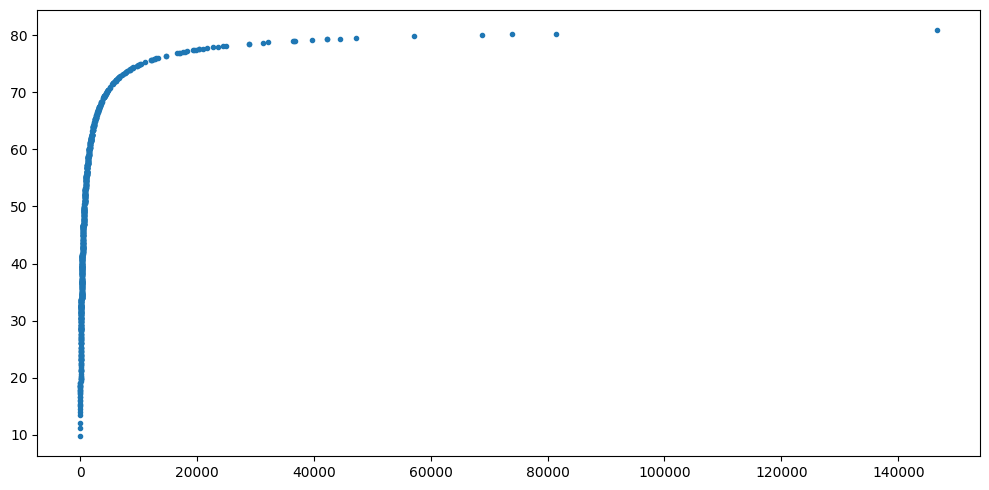

In [437]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*(x/b)**c/(1+(x/b)**c)
xdata = doctor_national_msa_count.values[0:-1]
ydata = distinct_professions_msa[0:-1]
popt, pcov = curve_fit(func,xdata,ydata)
plt.plot(xdata, func(xdata, *popt), '.',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt

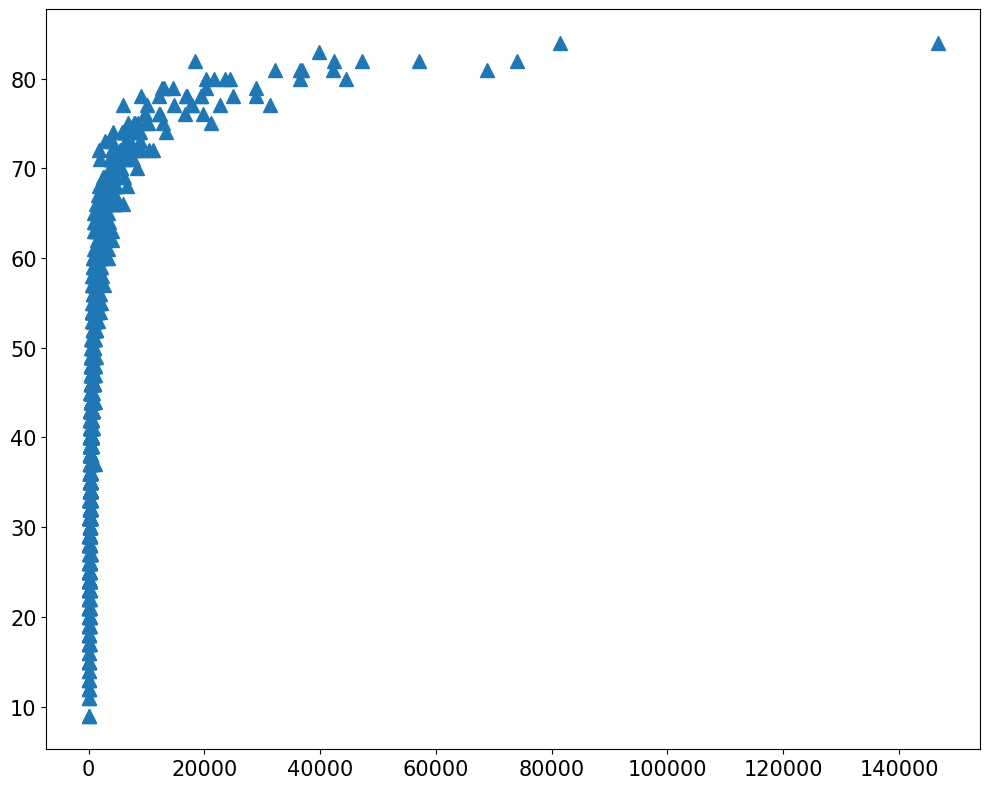

In [438]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(doctor_national_msa_count.values[0:-1],distinct_professions_msa[0:-1],"^",markersize=10)

Text(80000, 20, '$d_s$=81.954, $N_0$ = 401.443, $v_p$ = 0.73')

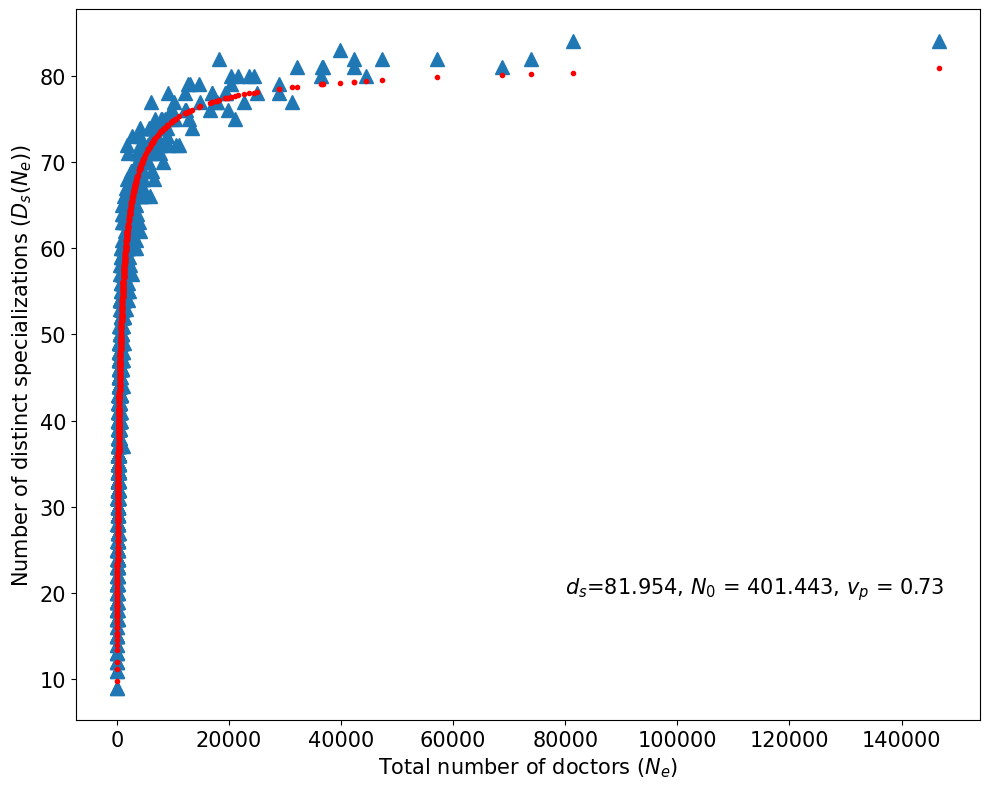

In [439]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(doctor_national_msa_count.values[0:-1],distinct_professions_msa[0:-1],"^",markersize=10)
plt.plot(xdata, func(xdata, *popt), 'r.',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel(r"Total number of doctors ($N_e$)",fontsize=15)
plt.ylabel(r"Number of distinct specializations ($D_s(N_e)$)",fontsize=15)
plt.text(80000,20,r"$d_s$={}, $N_0$ = {}, $v_p$ = {}".format(round(popt[0],3),round(popt[1],3),round(popt[2],3)),fontsize=15)

In [440]:
sort_index = [i for i, x in sorted(enumerate(beta_doctor_specialization), reverse=True, key=lambda x: x[1])]
R2_doctor_specialization_sorted = []
msa_name_doctor_sorted = []
intercept_doctor_specialization_sorted = []
var_sami_doctor_specialization_sorted = []
sami_doctor_specialization_sorted = []
for s in sort_index:
    # print(s,list(msa_doctor.keys())[s])
    try:
        msa_name_doctor_sorted.append(doctor_national["pri_spec"].unique()[s])
        R2_doctor_specialization_sorted.append(R2_doctor_specialization[s])
        intercept_doctor_specialization_sorted.append(intercept_doctor_specialization[s])
        var_sami_doctor_specialization_sorted.append(var_sami_doctor_specialization[s])
        sami_doctor_specialization_sorted.append(sami_doctor_specialization[s])
    except:
        pass
print(msa_name_doctor_sorted)
doctor_specialist = pd.DataFrame({"Specialization":msa_name_doctor_sorted,r"$\beta$":sorted(beta_doctor_specialization,reverse=True),r"$R^2$":R2_doctor_specialization_sorted,"Intercept":intercept_doctor_specialization_sorted,"SAMI":sami_doctor_specialization_sorted,"Variance of SAMI": var_sami_doctor_specialization_sorted})
doctor_specialist.set_index(["Specialization"],inplace=True)
doctor_specialist.to_csv("doctor_specialist_scaling.csv")

['INTERNAL MEDICINE', 'ANESTHESIOLOGY', 'PHYSICIAN ASSISTANT', 'PHYSICAL THERAPY', 'CLINICAL PSYCHOLOGIST', 'OBSTETRICS/GYNECOLOGY', 'NEUROLOGY', 'PSYCHIATRY', 'OPHTHALMOLOGY', 'GASTROENTEROLOGY', 'CLINICAL SOCIAL WORKER', 'NURSE PRACTITIONER', 'DIAGNOSTIC RADIOLOGY', 'DERMATOLOGY', 'ORTHOPEDIC SURGERY', 'CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA)', 'FAMILY PRACTICE', 'EMERGENCY MEDICINE', 'PODIATRY', 'CARDIOVASCULAR DISEASE (CARDIOLOGY)', 'PULMONARY DISEASE', 'HOSPITALIST', 'PHYSICAL MEDICINE AND REHABILITATION', 'GENERAL SURGERY', 'INFECTIOUS DISEASE', 'CHIROPRACTIC', 'ENDOCRINOLOGY', 'PATHOLOGY', 'OPTOMETRY', 'NEPHROLOGY', 'OTOLARYNGOLOGY', 'UROLOGY', 'HEMATOLOGY/ONCOLOGY', 'OCCUPATIONAL THERAPY', 'PEDIATRIC MEDICINE', 'RHEUMATOLOGY', 'PLASTIC AND RECONSTRUCTIVE SURGERY', 'NEUROSURGERY', 'QUALIFIED AUDIOLOGIST', 'CRITICAL CARE (INTENSIVISTS)', 'ALLERGY/IMMUNOLOGY', 'RADIATION ONCOLOGY', 'COLORECTAL SURGERY (PROCTOLOGY)', 'VASCULAR SURGERY', 'REGISTERED DIETITIAN OR NUTRITION PROF

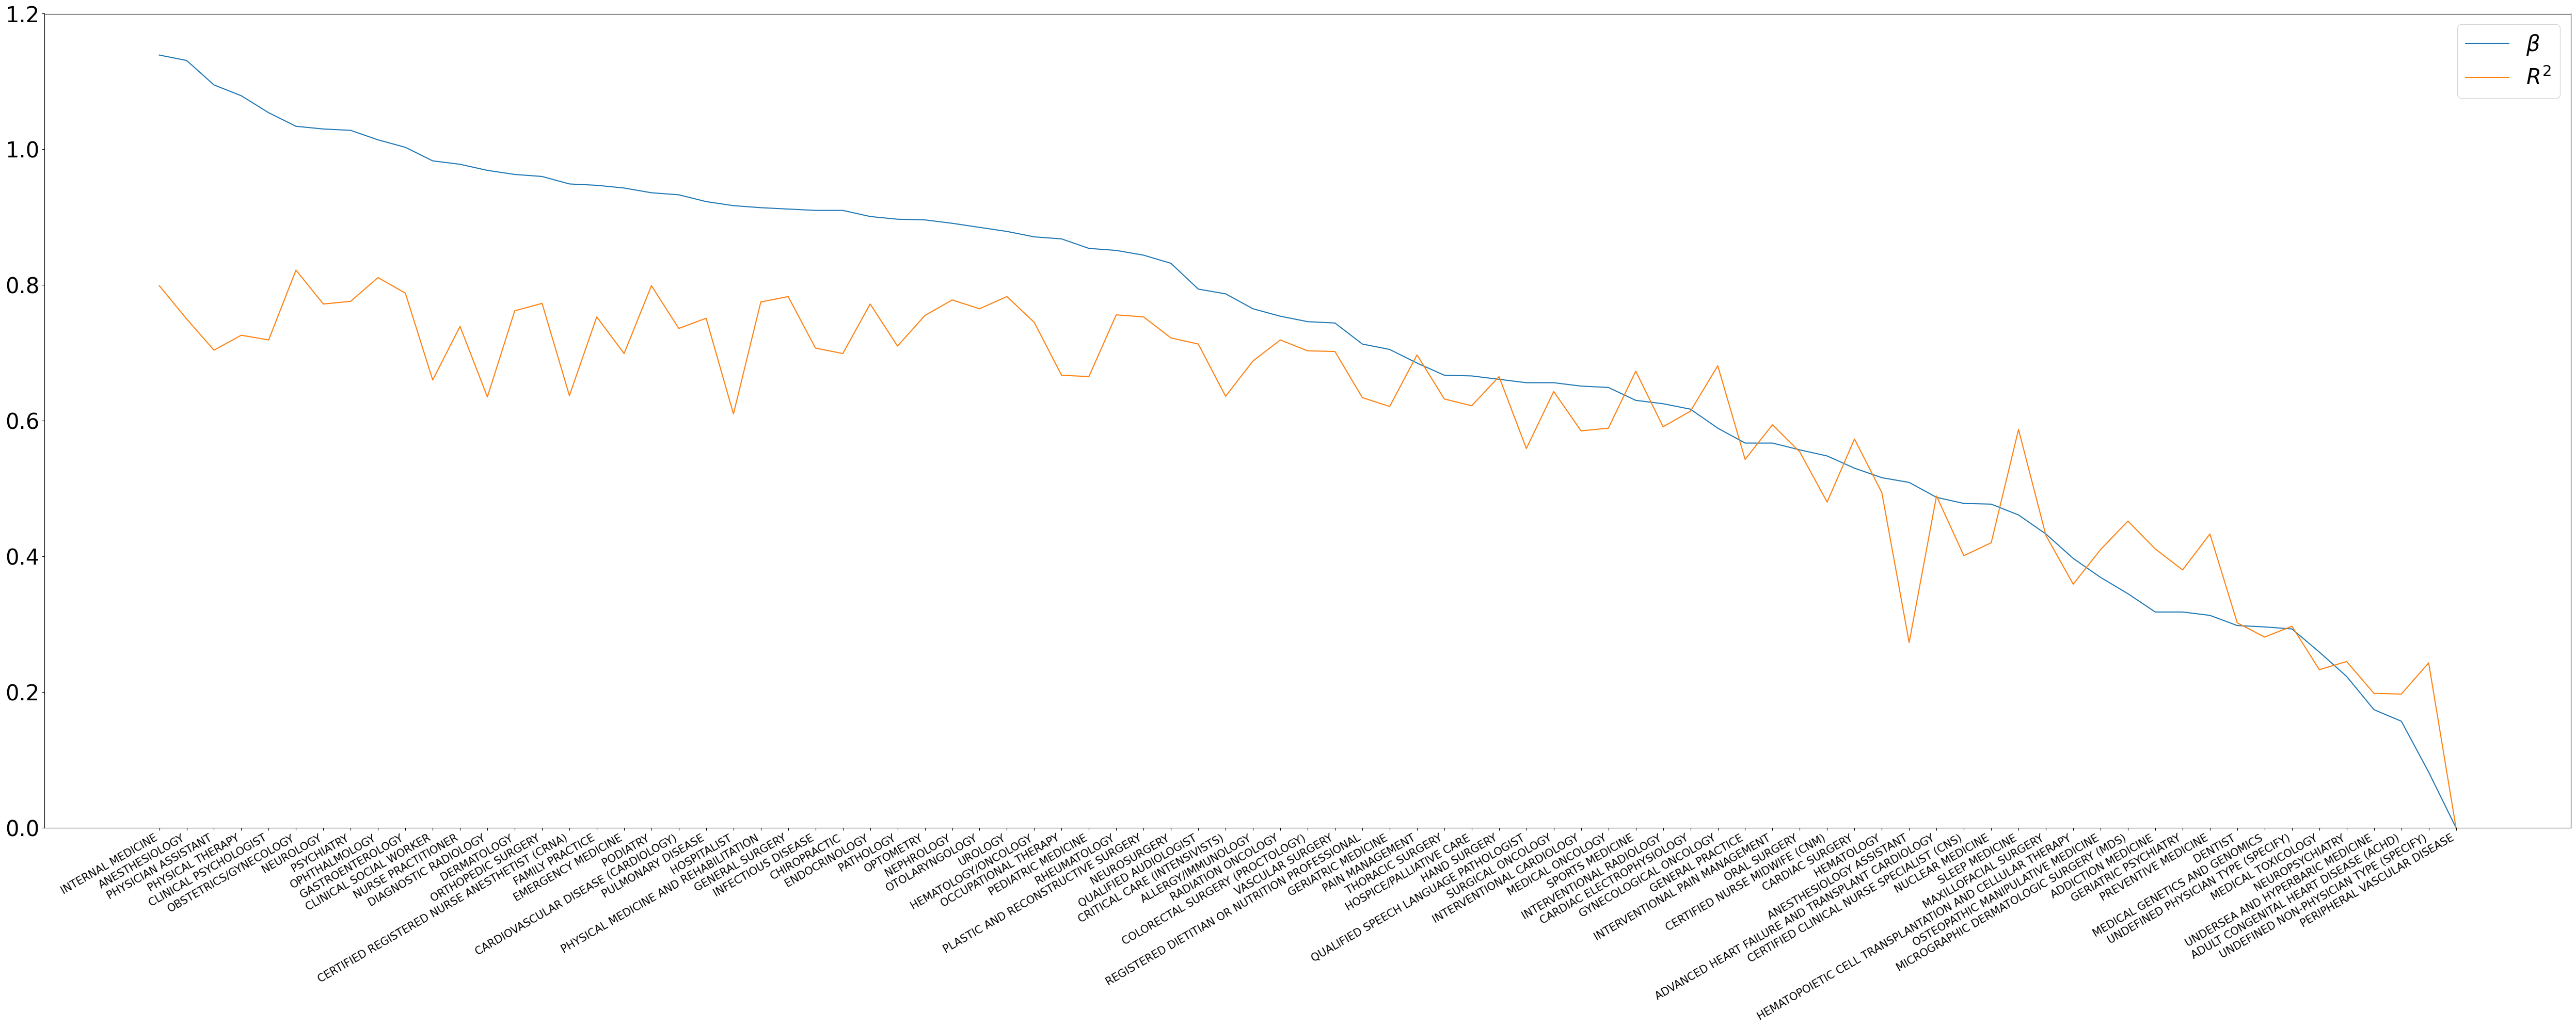

In [441]:
fig, ax = plt.subplots(figsize = (50, 20))
plt.plot(doctor_specialist.index,doctor_specialist[r"$\beta$"])
plt.plot(doctor_specialist.index,doctor_specialist[r"$R^2$"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=30)
plt.legend([r"$\beta$",r"$R^2$"],fontsize=30)
# plt.xlabel()
# ax.set_xticks(doctor_specialist.index)
# ax.set_xticks(range(len(doctor_specialist)))
# ax.set_xticklabels(["%s" % item for item in doctor_specialist.index.tolist()], rotation=90)
fig.autofmt_xdate()
plt.ylim(0,1.2)

plt.savefig("doctor_specialist.pdf")

In [442]:
doctors_msa_count

cbsa10
C1974    11
C3562     6
C3890     2
C1674     2
C1782     2
C2714     2
C1058     1
C4782     1
C4506     1
C4186     1
C4038     1
C3078     1
C3798     1
C1090     1
C2342     1
C2026     1
C1382     1
C4862     1
Name: count, dtype: int64

In [443]:
doctor_specialist

,$\beta$,$R^2$,Intercept,SAMI,Variance of SAMI
Specialization,,,,,
INTERNAL MEDICINE,1.139,0.799,-4.415710,"[0.11270847781125826, 0.06443892522404404, 0.3...",0.10
ANESTHESIOLOGY,1.131,0.750,-4.750585,"[-0.24107685471659684, -0.11023037717208073, 0...",0.12
PHYSICIAN ASSISTANT,1.095,0.704,-4.093505,"[-0.355866028404762, 0.11898061776235869, 0.42...",0.15
PHYSICAL THERAPY,1.079,0.726,-4.161541,"[-0.515260791094196, -0.1387245553888241, -0.2...",0.13
CLINICAL PSYCHOLOGIST,1.054,0.719,-4.562090,"[-0.17390274620919888, -0.30328520314977236, -...",0.13
...,...,...,...,...,...
NEUROPSYCHIATRY,0.223,0.245,-1.130595,"[0.00745573916226977, -0.18051234760753188, -0...",0.07
UNDERSEA AND HYPERBARIC MEDICINE,0.174,0.198,-0.858098,"[0.004253761875490203, 0.5236725387761901, 0.0...",0.05
ADULT CONGENITAL HEART DISEASE (ACHD),0.157,0.197,-0.803923,"[-0.09526998271459708, -0.23810304803388327, 0...",0.04


In [444]:
dic

{'ALLERGY/IMMUNOLOGY': 58,
 'ANESTHESIOLOGY': 4,
 'CERTIFIED REGISTERED NURSE ANESTHETIST CRNA': 16,
 'PAIN MANAGEMENT': 18,
 'ANESTHESIOLOGY ASSISTANT': 67,
 'INTERVENTIONAL PAIN MANAGEMENT': 69,
 'HOSPICE/PALLIATIVE CARE': 40,
 'CRITICAL CARE INTENSIVISTS': 36,
 'SLEEP MEDICINE': 74,
 'DERMATOLOGY': 32,
 'MICROGRAPHIC DERMATOLOGIC SURGERY': 71,
 'EMERGENCY MEDICINE': 45,
 'SPORT MEDICINE': 59,
 'UNDERSEA AND HYPERBARIC MEDICINE': 81,
 'MEDICAL TOXICOLOGY': 85,
 'FAMILY PRACTICE': 14,
 'GERIATRIC MEDICINE': 46,
 'HEMATOLOGY': 55,
 'HEMATOLOGY/ONCOLOGY': 52,
 'INTERNAL MEDICINE': 2,
 'CARDIOVASCULAR DISEASE CARDIOLOGY': 15,
 'INFECTIOUS DISEASE': 22,
 'ENDOCRINOLOGY': 25,
 'RHEUMATOLOGY': 29,
 'NEPHROLOGY': 33,
 'PULMONARY DISEASE': 41,
 'INTERVENTIONAL CARDIOLOGY': 42,
 'GASTROENTEROLOGY': 43,
 'CARDIAC ELECTROPHYSIOLOGY': 54,
 'ADULT CONGENITAL HEART DISEASE ACHD': 84,
 'ADVANCED HEART FAILURE AND TRANSPLANT CARDIOLOGY': 64,
 'REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL': 38,
 'ME

In [445]:
specialization = []
for m in range(len(msa_name_doctor_sorted)):
    if m not in [14,67,72,81,83]:
        ms = msa_name_doctor_sorted[m]
        ms = ms.replace("(", "")
        ms = ms.replace(")", "")
        specialization.append(ms)
    else:
        specialization.append(msa_name_doctor_sorted[m])
specialization

['INTERNAL MEDICINE',
 'ANESTHESIOLOGY',
 'PHYSICIAN ASSISTANT',
 'PHYSICAL THERAPY',
 'CLINICAL PSYCHOLOGIST',
 'OBSTETRICS/GYNECOLOGY',
 'NEUROLOGY',
 'PSYCHIATRY',
 'OPHTHALMOLOGY',
 'GASTROENTEROLOGY',
 'CLINICAL SOCIAL WORKER',
 'NURSE PRACTITIONER',
 'DIAGNOSTIC RADIOLOGY',
 'DERMATOLOGY',
 'ORTHOPEDIC SURGERY',
 'CERTIFIED REGISTERED NURSE ANESTHETIST CRNA',
 'FAMILY PRACTICE',
 'EMERGENCY MEDICINE',
 'PODIATRY',
 'CARDIOVASCULAR DISEASE CARDIOLOGY',
 'PULMONARY DISEASE',
 'HOSPITALIST',
 'PHYSICAL MEDICINE AND REHABILITATION',
 'GENERAL SURGERY',
 'INFECTIOUS DISEASE',
 'CHIROPRACTIC',
 'ENDOCRINOLOGY',
 'PATHOLOGY',
 'OPTOMETRY',
 'NEPHROLOGY',
 'OTOLARYNGOLOGY',
 'UROLOGY',
 'HEMATOLOGY/ONCOLOGY',
 'OCCUPATIONAL THERAPY',
 'PEDIATRIC MEDICINE',
 'RHEUMATOLOGY',
 'PLASTIC AND RECONSTRUCTIVE SURGERY',
 'NEUROSURGERY',
 'QUALIFIED AUDIOLOGIST',
 'CRITICAL CARE INTENSIVISTS',
 'ALLERGY/IMMUNOLOGY',
 'RADIATION ONCOLOGY',
 'COLORECTAL SURGERY PROCTOLOGY',
 'VASCULAR SURGERY',
 'RE

In [446]:
index_doc = []
for n in specialization:
    try: 
        index_doc.append(dic[n])
    except:
        index_doc.append(np.nan)
doctor_specialist["Nodes"] = index_doc
doctor_specialist["Doctor specialty"] = msa_name_doctor_sorted
doctor_specialist

,$\beta$,$R^2$,Intercept,SAMI,Variance of SAMI,Nodes,Doctor specialty
Specialization,,,,,,,
INTERNAL MEDICINE,1.139,0.799,-4.415710,"[0.11270847781125826, 0.06443892522404404, 0.3...",0.10,2.0,INTERNAL MEDICINE
ANESTHESIOLOGY,1.131,0.750,-4.750585,"[-0.24107685471659684, -0.11023037717208073, 0...",0.12,4.0,ANESTHESIOLOGY
PHYSICIAN ASSISTANT,1.095,0.704,-4.093505,"[-0.355866028404762, 0.11898061776235869, 0.42...",0.15,11.0,PHYSICIAN ASSISTANT
PHYSICAL THERAPY,1.079,0.726,-4.161541,"[-0.515260791094196, -0.1387245553888241, -0.2...",0.13,13.0,PHYSICAL THERAPY
CLINICAL PSYCHOLOGIST,1.054,0.719,-4.562090,"[-0.17390274620919888, -0.30328520314977236, -...",0.13,37.0,CLINICAL PSYCHOLOGIST
...,...,...,...,...,...,...,...
NEUROPSYCHIATRY,0.223,0.245,-1.130595,"[0.00745573916226977, -0.18051234760753188, -0...",0.07,77.0,NEUROPSYCHIATRY
UNDERSEA AND HYPERBARIC MEDICINE,0.174,0.198,-0.858098,"[0.004253761875490203, 0.5236725387761901, 0.0...",0.05,81.0,UNDERSEA AND HYPERBARIC MEDICINE
ADULT CONGENITAL HEART DISEASE (ACHD),0.157,0.197,-0.803923,"[-0.09526998271459708, -0.23810304803388327, 0...",0.04,84.0,ADULT CONGENITAL HEART DISEASE (ACHD)


In [447]:
doctor_specialist[doctor_specialist["Doctor specialty"].isin(["PEDIATRIC MEDICINE","PSYCHIATRY","FAMILY PRACTICE","CLINICAL SOCIAL WORKER","CLINICAL PSYCHOLOGIST"])]

,$\beta$,$R^2$,Intercept,SAMI,Variance of SAMI,Nodes,Doctor specialty
Specialization,,,,,,,
CLINICAL PSYCHOLOGIST,1.054,0.719,-4.562090,"[-0.17390274620919888, -0.30328520314977236, -...",0.13,37.0,CLINICAL PSYCHOLOGIST
PSYCHIATRY,1.028,0.776,-4.385079,"[-0.10466074312012674, 0.18824211566893623, 0....",0.09,27.0,PSYCHIATRY
CLINICAL SOCIAL WORKER,0.983,0.660,-3.850643,"[-0.38581563680293135, 0.04310083423161548, -0...",0.15,12.0,CLINICAL SOCIAL WORKER
FAMILY PRACTICE,0.947,0.753,-3.275675,"[-0.39331246575527146, 0.03526671487393829, 0....",0.09,14.0,FAMILY PRACTICE
PEDIATRIC MEDICINE,0.854,0.665,-4.009703,"[-0.12305486236057828, -0.7117571442407051, 0....",0.12,34.0,PEDIATRIC MEDICINE


In [408]:
doctor_specialist = doctor_specialist.merge(degrees,on="Nodes")
doctor_specialist

,$\beta$,$R^2$,Intercept,SAMI,Variance of SAMI,Nodes,Doctor specialty,In Degree,Out Degree,Clustering,In degree centrality,Out degree centrality
0,1.139,0.799,-4.415710,"[0.11270847781125826, 0.06443892522404404, 0.3...",0.10,2.0,INTERNAL MEDICINE,0,21,0.000000,0.000000,0.300000
1,1.131,0.750,-4.750585,"[-0.24107685471659684, -0.11023037717208073, 0...",0.12,4.0,ANESTHESIOLOGY,0,7,0.000000,0.000000,0.100000
2,1.095,0.704,-4.093505,"[-0.355866028404762, 0.11898061776235869, 0.42...",0.15,11.0,PHYSICIAN ASSISTANT,0,11,0.018182,0.000000,0.157143
3,1.079,0.726,-4.161541,"[-0.515260791094196, -0.1387245553888241, -0.2...",0.13,13.0,PHYSICAL THERAPY,0,11,0.009091,0.000000,0.157143
4,1.034,0.822,-4.265648,"[-0.037785867260429096, 0.11056706028004237, 0...",0.07,5.0,OBSTETRICS/GYNECOLOGY,1,3,0.000000,0.014286,0.042857
...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.259,0.233,-1.401240,"[0.07074300790485405, 0.04815990320501701, -0....",0.07,85.0,MEDICAL TOXICOLOGY,3,0,0.000000,0.042857,0.000000
65,0.223,0.245,-1.130595,"[0.00745573916226977, -0.18051234760753188, -0...",0.07,77.0,NEUROPSYCHIATRY,2,0,0.000000,0.028571,0.000000
66,0.174,0.198,-0.858098,"[0.004253761875490203, 0.5236725387761901, 0.0...",0.05,81.0,UNDERSEA AND HYPERBARIC MEDICINE,2,0,0.000000,0.028571,0.000000
67,0.157,0.197,-0.803923,"[-0.09526998271459708, -0.23810304803388327, 0...",0.04,84.0,ADULT CONGENITAL HEART DISEASE (ACHD),1,0,0.000000,0.014286,0.000000


In [409]:
for ds in range(len(doctor_specialist["Doctor specialty"])):
    if doctor_specialist["Doctor specialty"][ds] in specialization:
        # print(ds,"yes")
        pass
    else:
        print(ds,"no")

12 no
15 no
31 no
54 no
67 no


In [410]:
list(doctor_specialist["Doctor specialty"])

['INTERNAL MEDICINE',
 'ANESTHESIOLOGY',
 'PHYSICIAN ASSISTANT',
 'PHYSICAL THERAPY',
 'OBSTETRICS/GYNECOLOGY',
 'NEUROLOGY',
 'PSYCHIATRY',
 'GASTROENTEROLOGY',
 'NURSE PRACTITIONER',
 'DIAGNOSTIC RADIOLOGY',
 'DERMATOLOGY',
 'ORTHOPEDIC SURGERY',
 'CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA)',
 'FAMILY PRACTICE',
 'EMERGENCY MEDICINE',
 'CARDIOVASCULAR DISEASE (CARDIOLOGY)',
 'PULMONARY DISEASE',
 'HOSPITALIST',
 'PHYSICAL MEDICINE AND REHABILITATION',
 'GENERAL SURGERY',
 'INFECTIOUS DISEASE',
 'CHIROPRACTIC',
 'ENDOCRINOLOGY',
 'PATHOLOGY',
 'NEPHROLOGY',
 'HEMATOLOGY/ONCOLOGY',
 'OCCUPATIONAL THERAPY',
 'PEDIATRIC MEDICINE',
 'RHEUMATOLOGY',
 'PLASTIC AND RECONSTRUCTIVE SURGERY',
 'NEUROSURGERY',
 'CRITICAL CARE (INTENSIVISTS)',
 'ALLERGY/IMMUNOLOGY',
 'RADIATION ONCOLOGY',
 'VASCULAR SURGERY',
 'REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL',
 'GERIATRIC MEDICINE',
 'PAIN MANAGEMENT',
 'THORACIC SURGERY',
 'HOSPICE/PALLIATIVE CARE',
 'HAND SURGERY',
 'SURGICAL ONCOLOGY',
 'INT

In [411]:
doctor_specialist[doctor_specialist["Doctor specialty"].isin(["PSYCHIATRY","ADDICTION MEDICINE","SLEEP MEDICINE","GERIATRIC PSYCHIATRY","CLINICAL PSYCHOLOGIST","CLINICAL SOCIAL WORKER","FAMILY PRACTICE","PEDIATRIC MEDICINE"])][[r"$\beta$",r"$R^2$","Doctor specialty"]]

,$\beta$,$R^2$,Doctor specialty
6,1.028,0.776,PSYCHIATRY
13,0.947,0.753,FAMILY PRACTICE
27,0.854,0.665,PEDIATRIC MEDICINE
55,0.461,0.587,SLEEP MEDICINE
59,0.318,0.411,ADDICTION MEDICINE
60,0.318,0.380,GERIATRIC PSYCHIATRY


In [412]:
doctor_specialist[doctor_specialist["Doctor specialty"].isin(["INTERNAL MEDICINE","CARDIOVASCULAR DISEASE (CARDIOLOGY)","INTERVENTIONAL CARDIOLOGY","CARDIAC SURGERY","Advanced Heart Failure and Transplant Cardiology".upper(),"Cardiac Electrophysiology".upper(),"Adult Congenital Heart Disease (ACHD)".upper(),"Neurology".upper(),"Endocrinology".upper(),"Neuropsychiatric".upper(),"Sleep Medicine".upper(),"Neurosurgery".upper()])]


,$\beta$,$R^2$,Intercept,SAMI,Variance of SAMI,Nodes,Doctor specialty,In Degree,Out Degree,Clustering,In degree centrality,Out degree centrality
0,1.139,0.799,-4.415710,"[0.11270847781125826, 0.06443892522404404, 0.3...",0.10,2.0,INTERNAL MEDICINE,0,21,0.0,0.000000,0.300000
5,1.030,0.772,-4.567350,"[-0.038121017743429464, 0.18900200222667862, -...",0.09,31.0,NEUROLOGY,1,5,0.0,0.014286,0.071429
15,0.933,0.736,-3.897446,"[-0.10554821502065576, 0.11317518654789493, 0....",0.09,15.0,CARDIOVASCULAR DISEASE (CARDIOLOGY),2,0,0.0,0.028571,0.000000
22,0.901,0.772,-4.208083,"[-0.007115688861283553, -0.1155399174438605, 0...",0.07,25.0,ENDOCRINOLOGY,1,0,0.0,0.014286,0.000000
30,0.832,0.722,-3.815054,"[-0.0764493141322724, -0.024490616752054883, -...",0.08,48.0,NEUROSURGERY,1,0,0.0,0.014286,0.000000
42,0.651,0.585,-2.853135,"[0.026304260487661768, 0.005255965492567627, 0...",0.09,42.0,INTERVENTIONAL CARDIOLOGY,1,0,0.0,0.014286,0.000000
46,0.617,0.614,-2.863203,"[-0.1642471432218936, -0.12334070238862216, -0...",0.08,54.0,CARDIAC ELECTROPHYSIOLOGY,1,0,0.0,0.014286,0.000000
50,0.530,0.573,-2.561870,"[-0.3257990085808986, 0.26630023100295197, -0....",0.07,9.0,CARDIAC SURGERY,1,0,0.0,0.014286,0.000000
53,0.487,0.489,-2.407224,"[-0.10210069197227656, -0.2709788945134082, -0...",0.10,64.0,ADVANCED HEART FAILURE AND TRANSPLANT CARDIOLOGY,1,0,0.0,0.014286,0.000000
55,0.461,0.587,-2.250457,"[-0.21828959361030015, 0.22654390288137444, 0....",0.06,74.0,SLEEP MEDICINE,7,0,0.0,0.100000,0.000000


Text(10, 0.23, '$p-val = 0.037$')

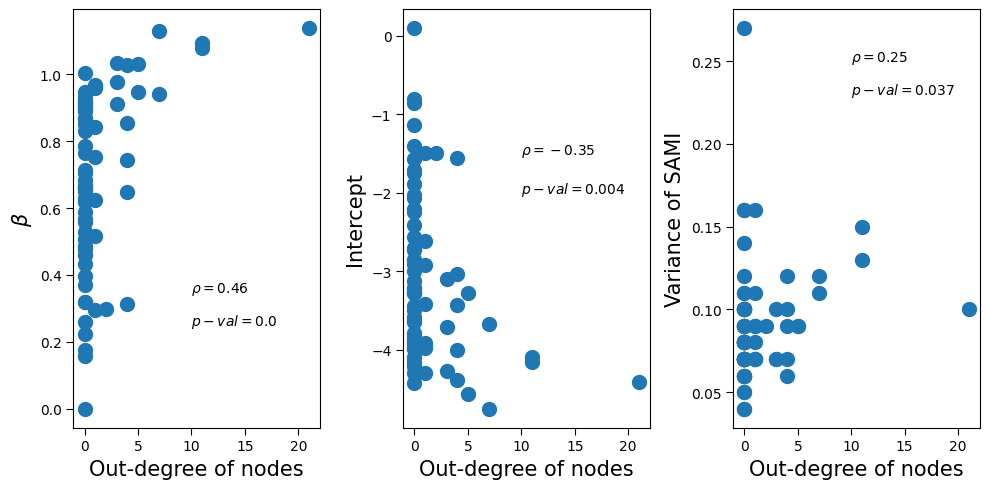

In [414]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.tick_params(size=5)
# ax1.set_xticks(fontsize=15)
# ax1.yticks(fontsize=15)
ax1.plot((doctor_specialist["Out Degree"]),doctor_specialist[r"$\beta$"],'o',markersize=10)
ax1.set_xlabel("Out-degree of nodes",size=15)
ax1.set_ylabel(r"$\beta$",size=15)
rho,pval = spearmanr(doctor_specialist["Out Degree"],doctor_specialist[r"$\beta$"])
ax1.text(10,0.35,r"$\rho = {}$".format(round(rho,2)))
ax1.text(10,0.25,r"$p-val = {}$".format(round(pval,3)))

ax2.tick_params(size=5)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax2.plot(doctor_specialist["Out Degree"],doctor_specialist["Intercept"],'o',markersize=10)
ax2.set_xlabel("Out-degree of nodes",size=15)
ax2.set_ylabel("Intercept",size=15)
rho,pval = spearmanr(doctor_specialist["Out Degree"],doctor_specialist["Intercept"])
ax2.text(10,-1.5,r"$\rho = {}$".format(round(rho,2)))
ax2.text(10,-2,r"$p-val = {}$".format(round(pval,3)))


ax3.tick_params(size=5)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax3.plot(doctor_specialist["Out Degree"],doctor_specialist["Variance of SAMI"],'o',markersize=10)
ax3.set_xlabel("Out-degree of nodes",size=15)
ax3.set_ylabel("Variance of SAMI",size=15)
rho,pval = spearmanr(doctor_specialist["Out Degree"],doctor_specialist["Variance of SAMI"])
ax3.text(10,.25,r"$\rho = {}$".format(round(rho,2)))
ax3.text(10,.23,r"$p-val = {}$".format(round(pval,3)))

Text(0.15, 0.23, '$p-val = 0.037$')

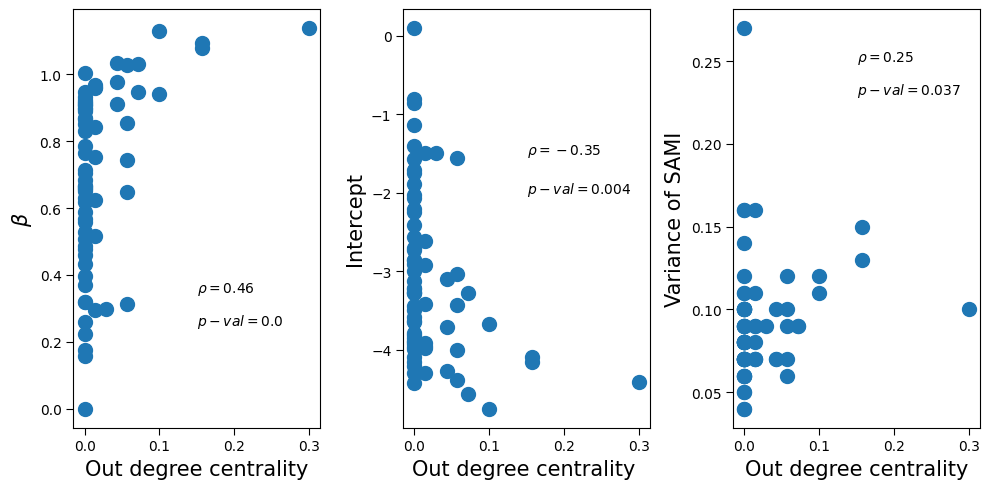

In [415]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.tick_params(size=5)
# ax1.set_xticks(fontsize=15)
# ax1.yticks(fontsize=15)
ax1.plot((doctor_specialist["Out degree centrality"]),doctor_specialist[r"$\beta$"],'o',markersize=10)
ax1.set_xlabel("Out degree centrality",size=15)
ax1.set_ylabel(r"$\beta$",size=15)
rho,pval = spearmanr(doctor_specialist["Out degree centrality"],doctor_specialist[r"$\beta$"])
ax1.text(.15,0.35,r"$\rho = {}$".format(round(rho,2)))
ax1.text(.15,0.25,r"$p-val = {}$".format(round(pval,3)))

ax2.tick_params(size=5)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax2.plot(doctor_specialist["Out degree centrality"],doctor_specialist["Intercept"],'o',markersize=10)
ax2.set_xlabel("Out degree centrality ",size=15)
ax2.set_ylabel("Intercept",size=15)
rho,pval = spearmanr(doctor_specialist["Out degree centrality"],doctor_specialist["Intercept"])
ax2.text(.15,-1.5,r"$\rho = {}$".format(round(rho,2)))
ax2.text(.15,-2,r"$p-val = {}$".format(round(pval,3)))


ax3.tick_params(size=5)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
ax3.plot(doctor_specialist["Out degree centrality"],doctor_specialist["Variance of SAMI"],'o',markersize=10)
ax3.set_xlabel("Out degree centrality",size=15)
ax3.set_ylabel("Variance of SAMI",size=15)
rho,pval = spearmanr(doctor_specialist["Out degree centrality"],doctor_specialist["Variance of SAMI"])
ax3.text(.15,.25,r"$\rho = {}$".format(round(rho,2)))
ax3.text(.15,.23,r"$p-val = {}$".format(round(pval,3)))

Text(0.15, 0.25, '$p-val = 8e-05$')

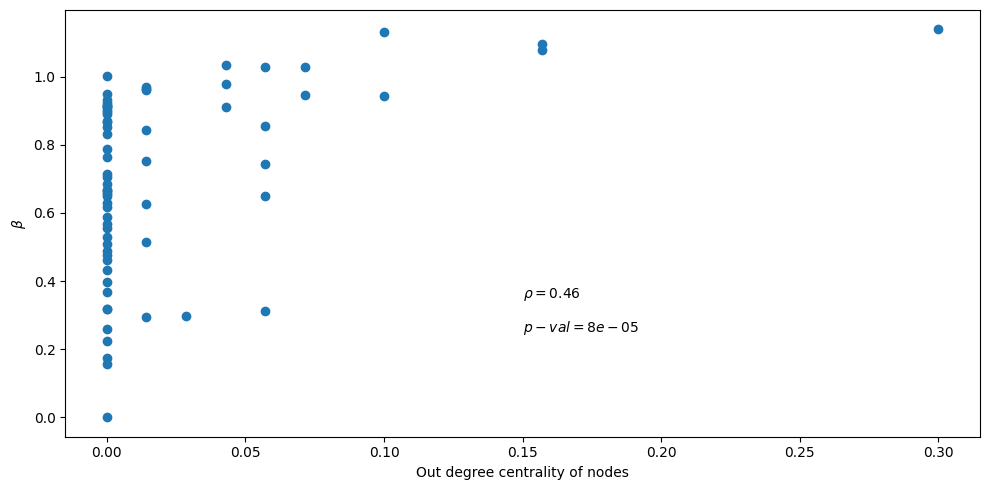

In [416]:
plt.plot(doctor_specialist[ "Out degree centrality"],doctor_specialist[r"$\beta$"],'o')
plt.xlabel("Out degree centrality of nodes")
plt.ylabel(r"$\beta$")
rho,pval = spearmanr(doctor_specialist["Out degree centrality"],doctor_specialist[r"$\beta$"])
plt.text(.15,0.35,r"$\rho = {}$".format(round(rho,2)))
plt.text(.15,0.25,r"$p-val = {}$".format(round(pval,5)))

Text(15, 0.25, '$p-val = 0.00424$')

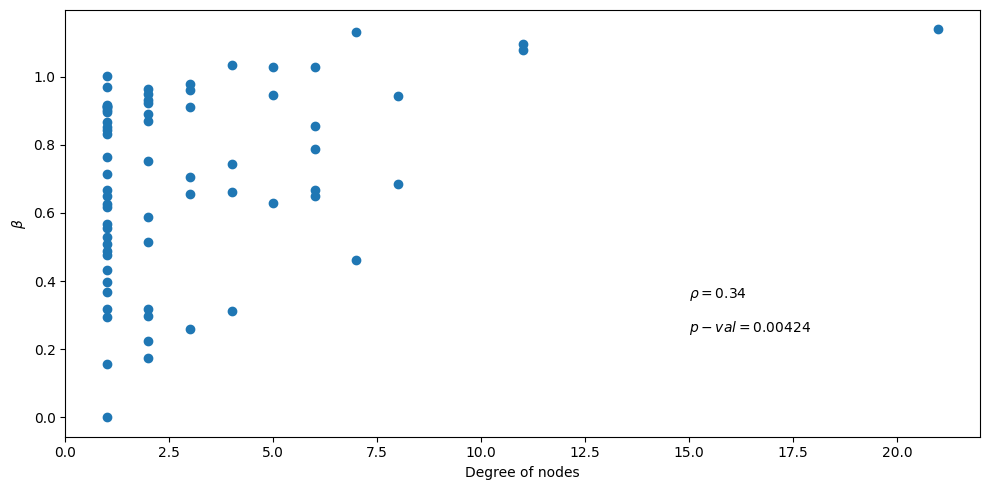

In [417]:
plt.plot(doctor_specialist["Out Degree"]+doctor_specialist["In Degree"],doctor_specialist[r"$\beta$"],'o')
plt.xlabel("Degree of nodes")
plt.ylabel(r"$\beta$")
rho,pval = spearmanr(doctor_specialist["Out Degree"]+doctor_specialist["In Degree"],doctor_specialist[r"$\beta$"])
plt.text(15,0.35,r"$\rho = {}$".format(round(rho,2)))
plt.text(15,0.25,r"$p-val = {}$".format(round(pval,5)))